### PCA steps

1. Center the datset: For each member of the dataset, just subtract the mean.  This will center the data, since if the mean is zero, then the data is centered on zero.
2. Compute the covariance matrix
3. Find the eigenvectors and eigenvalues of the covariance matrix
4. The eigenvectors become the principal components:  These give you the direction of greatest variance.
5. The eigenvalues provide the explained variance:  The eigenvalues tell you how of the variance the individual component explains.  Once you have found the eigenvectors and eigenvalues, you will sort them in order of decreasing eigenvalues, then you have the greatest variance first.  You pick the first eigenvector which will be your first principal component.  That is the direction that preserves the most variance, compared to any other direction.  Then you will keep picking directions until you reach the required number of dimensions.  
6. Select new dimensions and project the data onto the lower dimension.  Once you have found your principal components, you will use them to select new dimensions and project the data onto those dimensions, and then you will end up with a new dataset.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
from sklearn import decomposition

def plot_arrow(ax, start, stop):
    ax.annotate('', xytext=start, xy=stop,                 
                arrowprops=dict(facecolor='red', width=2.0))
    
# the corr_vars function just generates some random data
def corr_vars( start=-10, stop=10, step=0.5, mu=0, sigma=3, func=lambda x: x ):
    x = np.arange(start, stop, step)    
    e = np.random.normal(mu, sigma, x.size)
    y = np.zeros(x.size)
    
    for ind in range(x.size):
        y[ind] = func(x[ind]) + e[ind]
    
    return (x,y)

In [2]:
np.random.seed(100)

# this just generates a matrix where the first column is a sequential between
# two numbers with a set step and the second column is defined with a function
# as shown below.  the 'sigma' generates some random gaussian noise

(x1,x2) = corr_vars(start=2, stop=4, step=0.2, sigma=2, func=lambda x: 2*math.sin(x))

A = np.column_stack((x1,x2))

Aorig = A

A

array([[ 2.        , -1.68093609],
       [ 2.2       ,  2.30235361],
       [ 2.4       ,  3.65699797],
       [ 2.6       ,  0.52613067],
       [ 2.8       ,  2.63261787],
       [ 3.        ,  1.3106777 ],
       [ 3.2       ,  0.32561105],
       [ 3.4       , -2.65116887],
       [ 3.6       , -1.26403255],
       [ 3.8       , -0.71371289]])

(-4.0, 5.0)

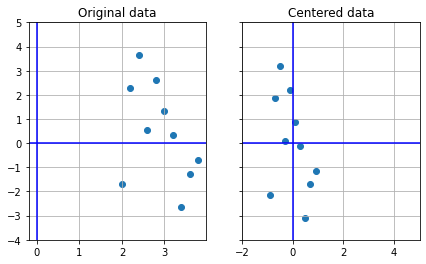

In [3]:
# so we end up with this matrix A
# if we plot the data as it is, it is uncentered, so the first step is to
# center the data.  Here is shown both the uncentered and centered data:

A = (A-np.mean(A,axis=0))

# Plot the original matrix
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(7,4))
ax1.scatter(Aorig[:,0], Aorig[:,1])
ax1.set_title("Original data")
ax1.grid(True)

# Plot the centered data
ax2.scatter(A[:,0],A[:,1])
ax2.set_title("Centered data")
ax2.grid(True)

ax1.axhline(0, color="blue")
ax1.axvline(0, color="blue")
ax2.axhline(0, color="blue")
ax2.axvline(0, color="blue")

plt.xlim([-2,5])
plt.ylim([-4,5])

In [4]:
# you can see that the matrix A has been transformed
# so that the data is centered:

A

array([[-0.9       , -2.12538994],
       [-0.7       ,  1.85789977],
       [-0.5       ,  3.21254412],
       [-0.3       ,  0.08167682],
       [-0.1       ,  2.18816403],
       [ 0.1       ,  0.86622385],
       [ 0.3       , -0.1188428 ],
       [ 0.5       , -3.09562271],
       [ 0.7       , -1.7084864 ],
       [ 0.9       , -1.15816674]])

In [5]:
# the coveriance matrix, which is normally called Sigma is here designated S

S = np.dot(A.T,A)/(A.shape[0]-1)

print("The covariance matrix is:")
print(S,"\n")

The covariance matrix is:
[[ 0.36666667 -0.55248919]
 [-0.55248919  4.18798554]] 



Vector slope:  [-0.]


(-5.0, 5.0)

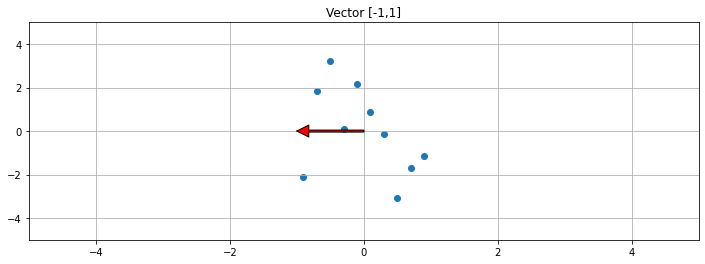

In [6]:
# we pick a vector with coordinates -1 and 0, plotted along with the datapoints:

f, ax1 = plt.subplots(1, 1, sharey=True, figsize=(12,4))

V = np.array([[-1],[0]])
print("Vector slope: ",V[1]/V[0])
ax1.scatter(A[:,0],A[:,1])
ax1.set_title("Vector [-1,1]")
ax1.grid(True)
ax1.plot([0,V[0]],[0,V[1]],c='r')
plot_arrow(ax1, (0,0),(V[0],V[1]))
plt.xlim([-5,5])
plt.ylim([-5,5])

Vector slope:  [-1.50678871]


(-5.0, 5.0)

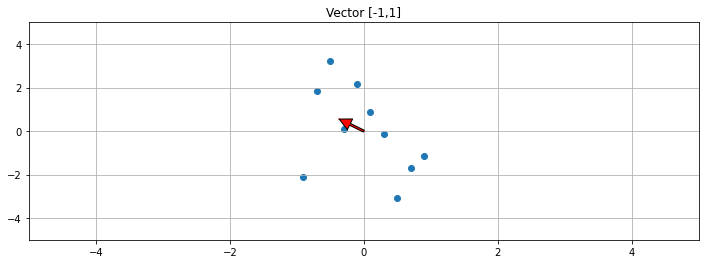

In [7]:
# next we multiply this vector V by the covariance matrix using vector maxtrix product
# and we will see that the vector will turn in the direction of the greatest variance 
# between the data points which we can actually already see before doing this is from 
# top left to bottom right.  In the output, you can also see the new slope of the vector
# which is close to -1.5.  We are saving this new vector as the new vector called V 

f, ax1 = plt.subplots(1, 1, sharey=True, figsize=(12,4))

V = np.dot(S,V)
print("Vector slope: ",V[1]/V[0])
ax1.scatter(A[:,0],A[:,1])
ax1.set_title("Vector [-1,1]")
ax1.grid(True)
ax1.plot([0,V[0]],[0,V[1]],c='r')
plot_arrow(ax1, (0,0),(V[0],V[1]))

plt.xlim([-5,5])
plt.ylim([-5,5])

Vector slope:  [-5.72313052]


(-5.0, 5.0)

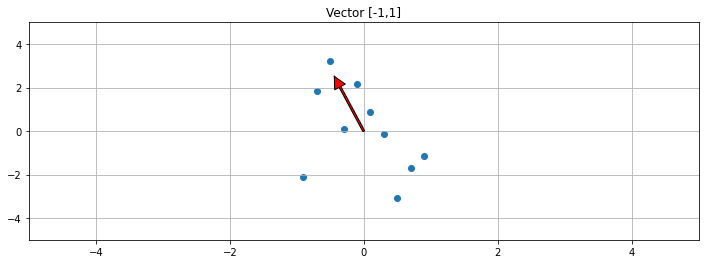

In [8]:
# next, we multiply the newly formed vector V by the covariance matrix again
# and save this as the new vector V.  This new vector turns even more in the direction
# of the greatest variance, and not only does the vector turn its direction again, but
# it also gets longer. the new slope of close to -5.72 is in the output below

f, ax1 = plt.subplots(1, 1, sharey=True, figsize=(12,4))

V = np.dot(S,V)
print("Vector slope: ",V[1]/V[0])
ax1.scatter(A[:,0],A[:,1])
ax1.set_title("Vector [-1,1]")
ax1.grid(True)
ax1.plot([0,V[0]],[0,V[1]],c='r')
plot_arrow(ax1, (0,0),(V[0],V[1]))

plt.xlim([-5,5])
plt.ylim([-5,5])

Vector slope:  [-6.94911232]


(-5.0, 5.0)

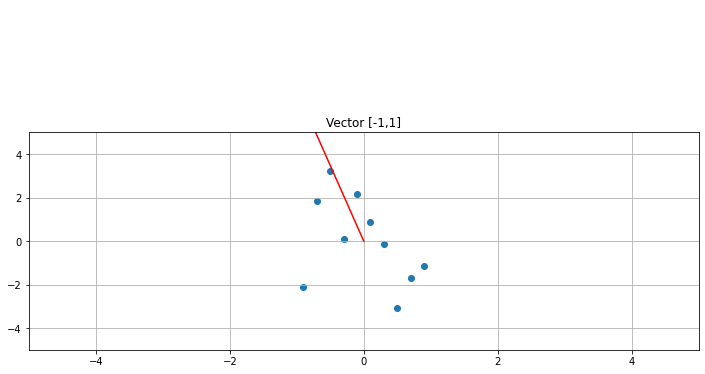

In [9]:
# we do the same thing again
# Notice that this time the vector grew so large that
# the point of the arrow is not visible on the graph

f, ax1 = plt.subplots(1, 1, sharey=True, figsize=(12,4))

V = np.dot(S,V)
print("Vector slope: ",V[1]/V[0])
ax1.scatter(A[:,0],A[:,1])
ax1.set_title("Vector [-1,1]")
ax1.grid(True)
ax1.plot([0,V[0]],[0,V[1]],c='r')
plot_arrow(ax1, (0,0),(V[0],V[1]))

plt.xlim([-5,5])
plt.ylim([-5,5])

In [10]:
# we can do this repeatedly, and we can see that the slope of the vector converges on
# something nearby -7.0582.  This direction of the slope's convergence is the direction
# of greatest variance for the data set.  And indeed we can see that visually.  This direction
# maximizes the difference between the points of the data set in that direction.  So the idea
# is that if we now stop, and use a line in this direction to project the points onto this
# line in a perpendicular fashion, then we will have successfully changed our dataset from
# three dimensions to two dimensions, and have done so in such a way as to preserve the greatest
# possible amount of the variance between the points.  This means that we would have minimized
# the possible information loss compared to using a different direction for the projection.

print("The slope of the vector converges to the direction of greatest variance:\n")

V = np.dot(S,V)
print("Vector slope: ",V[1]/V[0])
V = np.dot(S,V)
print("Vector slope: ",V[1]/V[0])
V = np.dot(S,V)
print("Vector slope: ",V[1]/V[0])
V = np.dot(S,V)
print("Vector slope: ",V[1]/V[0])
V = np.dot(S,V)
print("Vector slope: ",V[1]/V[0])
V = np.dot(S,V)
print("Vector slope: ",V[1]/V[0])

The slope of the vector converges to the direction of greatest variance:

Vector slope:  [-7.0507464]
Vector slope:  [-7.0577219]
Vector slope:  [-7.05819391]
Vector slope:  [-7.05822582]
Vector slope:  [-7.05822798]
Vector slope:  [-7.05822813]


In [11]:
# it is possible to find the first principal component using the algorithm described above,
# but it is not the most computationally efficient way to do so.  there is an analytical
# solution that will give us all the eigenvalues and eigenvectors of the dataset
# the explanation for the analytica method is here:
# https://en.wikipedia.org/wiki/Eigenvalue_algorithm

# the analytical calculation of the eigenvalues and eigenvectors is what follows:
# these are two solutions to a quadratic equation, you can see the + and - in the 
# formulas below

l_1 = (S.trace() + np.sqrt(pow(S.trace(),2) - 4*np.linalg.det(S))) / 2
l_2 = (S.trace() - np.sqrt(pow(S.trace(),2) - 4*np.linalg.det(S))) / 2

print("The eigenvalues are:")
print("L1:",l_1)
print("L2:",l_2)

The eigenvalues are:
L1: 4.266261447240239
L2: 0.28839076171131417


In [12]:
# the analytical calculation of the eigenvectors uses
# the following threorem:

# Cayley-Hamilton theorem
# (A - λ1I )(A - λ2I ) = (A - λ2I )(A - λ1I ) = 0

A1 = S - l_1 * np.identity(2)
A2 = S - l_2 * np.identity(2)

E1 = A2[:,1]
E2 = A1[:,0]

E1 = E1 / np.linalg.norm(E1)
E2 = E2 / np.linalg.norm(E2)

print("The eigenvectors are:")
print("E1:", E1)
print("E2:", E2)

The eigenvectors are:
E1: [-0.14027773  0.9901122 ]
E2: [-0.9901122  -0.14027773]


In [13]:
# here we just stack the two eignevectors together into
# a matrix called matrix E

E = np.column_stack((E1,E2))

E

array([[-0.14027773, -0.9901122 ],
       [ 0.9901122 , -0.14027773]])

In [14]:
# and just to check this calculation, we can use the eigenvalues and eigenvectors
# as calculated using numpy, and we can compare that to the manually computed PCA's

evals, evecs = np.linalg.eigh(S)

print(evals)
print(evecs)

[0.28839076 4.26626145]
[[-0.9901122  -0.14027773]
 [-0.14027773  0.9901122 ]]


(-4.0, 5.0)

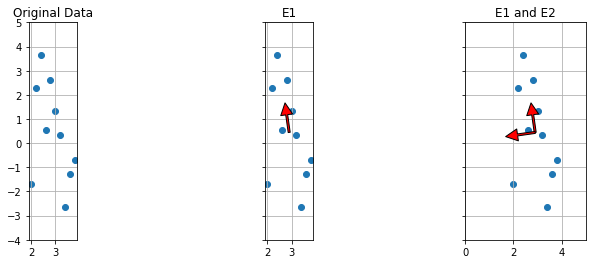

In [15]:
# so they turn out to be the same, so the manual calculation proves to be correct

# now we plot the orignal data and the first and second eigenvectors

f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize=(12,4))
ax1.scatter(Aorig[:,0],Aorig[:,1])
ax1.set_title("Original Data")
ax1.grid(True)
ax1.set_aspect('equal')

ax2.scatter(Aorig[:,0],Aorig[:,1])
ax2.set_title("E1")
ax2.grid(True)
plot_arrow(ax2, np.mean(Aorig,axis=0), np.mean(Aorig,axis=0) + np.dot(Aorig, E).std(axis=0).mean() * E1)
ax2.set_aspect('equal')               

ax3.scatter(Aorig[:,0],Aorig[:,1])
ax3.set_title("E1 and E2")
ax3.grid(True)
plot_arrow(ax3, np.mean(Aorig,axis=0), np.mean(Aorig,axis=0) + np.dot(Aorig, E).std(axis=0).mean() * E1)
plot_arrow(ax3, np.mean(Aorig,axis=0), np.mean(Aorig,axis=0) + np.dot(Aorig, E).std(axis=0).mean() * E2)
ax3.set_aspect('equal')               

plt.xlim([0,5])
plt.ylim([-4,5])

In [16]:
# the final thing to do is to project the data
# we just take the dot product of the original data set and the
# first and second principal components

# F1 only would be the projection of the original data set along the
# direction of the first principal component

F1 = np.dot(A, E1)
F2 = np.dot(A, E2)

F = np.column_stack((F1, F2))
F

array([[-1.97812455,  1.18924584],
       [ 1.93772363,  0.43245658],
       [ 3.25091797,  0.04440771],
       [ 0.12295254,  0.28557622],
       [ 2.18055566, -0.20793946],
       [ 0.84363103, -0.22052313],
       [-0.15975102, -0.28036266],
       [-3.13515266, -0.06080918],
       [-1.78978762, -0.45341595],
       [-1.27296497, -0.72863598]])

In [17]:
# now here is the principal component analysis implementation
# from scikit learn for a sanity check on our manual calculation above
# and we can see that it is exactly the same

pca = decomposition.PCA(n_components=2)
print(pca.fit_transform(A))

[[-1.97812455  1.18924584]
 [ 1.93772363  0.43245658]
 [ 3.25091797  0.04440771]
 [ 0.12295254  0.28557622]
 [ 2.18055566 -0.20793946]
 [ 0.84363103 -0.22052313]
 [-0.15975102 -0.28036266]
 [-3.13515266 -0.06080918]
 [-1.78978762 -0.45341595]
 [-1.27296497 -0.72863598]]
